# Energy consumption

This file is used to plot and explore the power traces, but does not do any in depth analysis

In [1]:
import os
import matplotlib.pyplot as plt
import helpers as h
from run_power_consumption import masked_ascon_traces, ascon_traces, aes_gcm_traces, none_traces
from matplotlib.ticker import MultipleLocator

In [2]:
method = "ASCON"

encryption_methods = {
    "NONE": (none_traces, "none1-11"),
    "AES-GCM": (aes_gcm_traces, "aes-gcm1-12"),
    "ASCON": (ascon_traces, "ascon1-6:8-12"),
    "Masked ASCON": (masked_ascon_traces, "masked-ascon2:7-9:12")
}

fs = 4000

In [3]:
# ASCON
path = os.path.join("..", "energy_consumption" ,encryption_methods[method][1], "Main power - Arc.csv")
orig_df = h.read_data(path)

### Separate power traces

In [4]:
dfs = encryption_methods[method][0](orig_df)

In [5]:
smooth_s   = 0.03
thresh = 0.120
min_gap_s = 0.3

segmented = h.fast_segment(df=dfs[11],
                           value_col='Value',
                           fs=fs,
                           target_fs=2000,
                           smooth_s=smooth_s,
                           thresh=thresh,
                           min_gap_s=min_gap_s)
segmented["Timestamp"] = segmented.index / fs
segmented["Value"] = segmented["Value"]*1e3
# h.plot_segmented(segmented, fs=fs, ylim=(100, 230))

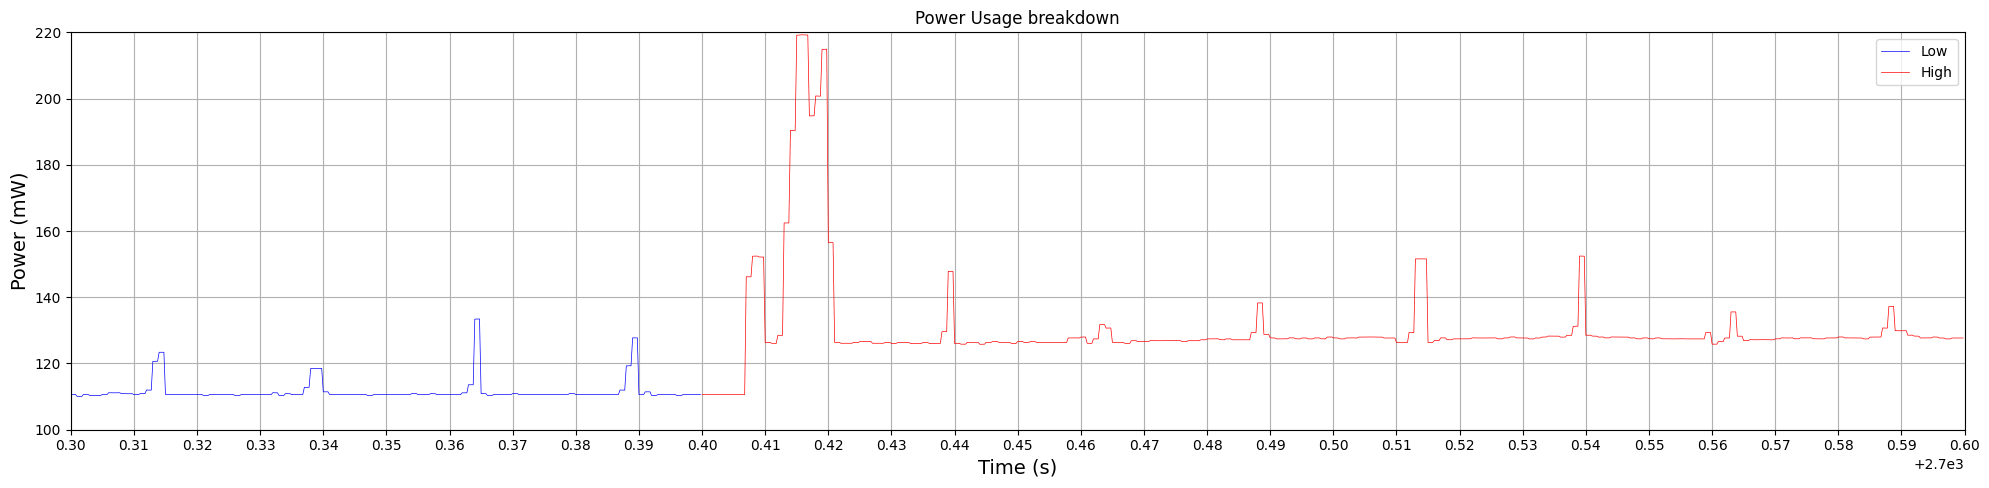

In [6]:
#plot a 4s segment
start = 0
end = 1
seq = 45

fig, ax = h.plot_segmented(
    segmented,
    fs=fs,
    ylim=(100, 220),
    xlim=(seq * 60 +0.3, seq * 60 + 0.6)
)

ax.set_title("Power Usage breakdown")
ax.xaxis.set_major_locator(MultipleLocator(0.01))
plt.show()

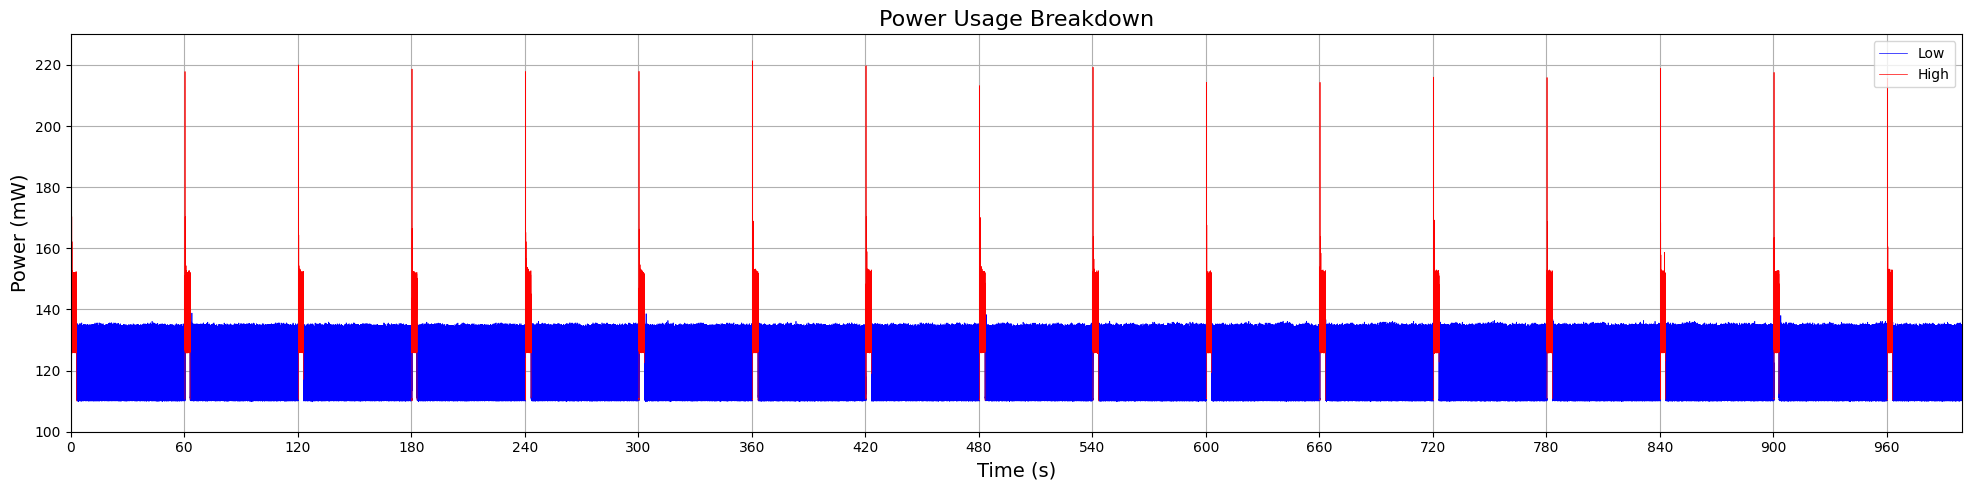

In [7]:
fig, ax = h.plot_segmented(segmented,
                       fs=fs,
                       ylim=(100, 230),
                       xlim=(0, 1000),
                       downsample=4)

ax.xaxis.set_major_locator(MultipleLocator(60))
# plt.show()

In [8]:
# save the figure
# fig.savefig(os.path.join("..", "figures", "power_consumption", "Ascon_scen4.png"),
#             dpi=300,
#             bbox_inches='tight')